# Analyzing Average Google Stock Prices in 2009

### Selena Flannery -- November 16, 2016

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random

filename = "data/goog_1yr.csv"
google = pd.read_csv(filename)
x = "Years Since 2009"
y = "Daily Avg"

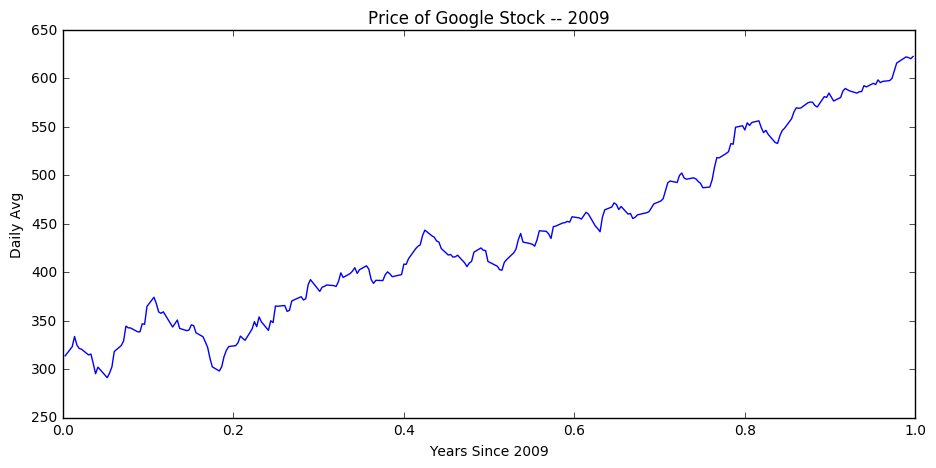

In [2]:
plt.figure(figsize=(11,5))
plt.plot(google[x], google[y])
plt.title("Price of Google Stock -- 2009")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

## Linear Regression

### Estimations.

In [3]:
b = 280
m = 290
google["man_avg"] = pd.Series(google[x] * m + b)

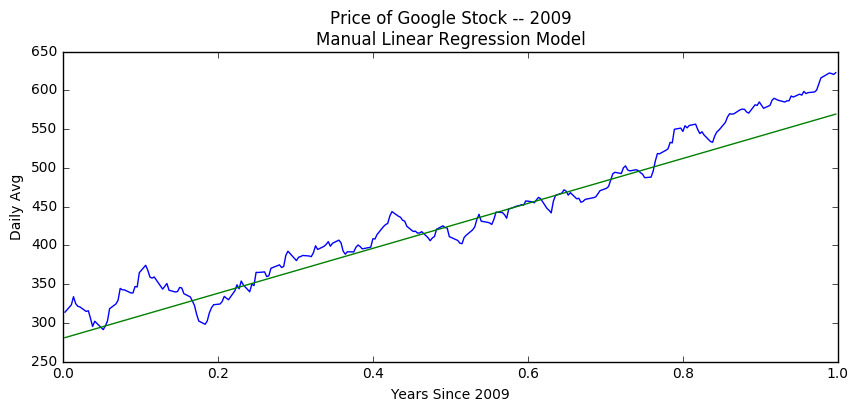

In [4]:
plt.figure(figsize=(10,4))
plt.plot(google[x], google[y])
plt.plot(google[x], google["man_avg"])
plt.title("Price of Google Stock -- 2009\nManual Linear Regression Model")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

### Gradient Descent

In [5]:
def step_gradient(m, b, data, x, y, learning_rate):
    N = len(data)
        
    m_grad = -(2/N) * (data[x] * (data[y] - (m * data[x] + b))).sum()
    b_grad = -(2/N) * (data[y] - (m * data[x] + b)).sum()
    
    new_m = m - (learning_rate * m_grad)
    new_b = b - (learning_rate * b_grad)

    return new_m, new_b

def gradient_descent(data, x, y, learning_rate=.1, steps=1000):
    b, m = random.randint(0, 100), random.randint(0, 1000)
    for _ in range(steps):
        m, b = step_gradient(m, b, data, x, y, learning_rate)
    return m, b

In [6]:
m, b = gradient_descent(google, x, y, steps=5000)

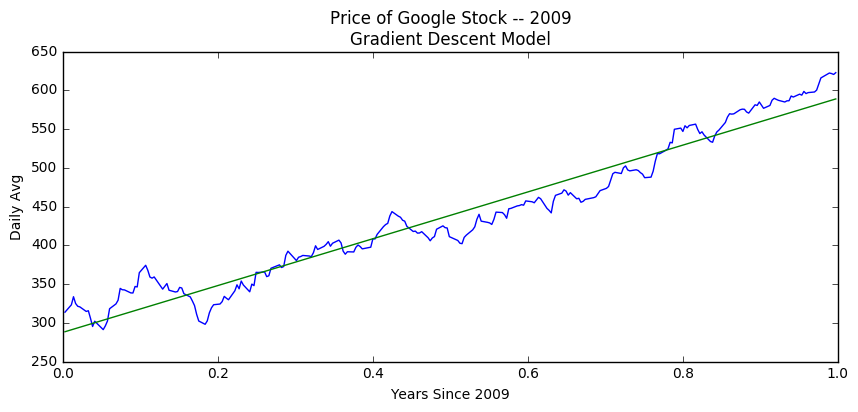

In [7]:
plt.figure(figsize=(10,4))
plt.plot(google[x], google[y])
plt.plot(google[x], google[x] * m + b)
plt.title("Price of Google Stock -- 2009\nGradient Descent Model")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

### Sci Kit Learn

Create a linear regression object, fit reshaped data and retrieve slope and intercept.

In [21]:
regress = LinearRegression()

regress.fit(google[x].reshape(-1, 1), google[y])

m = regress.coef_[0]
b = regress.intercept_ 
m, b

(302.01534383058117, 287.59810765950431)

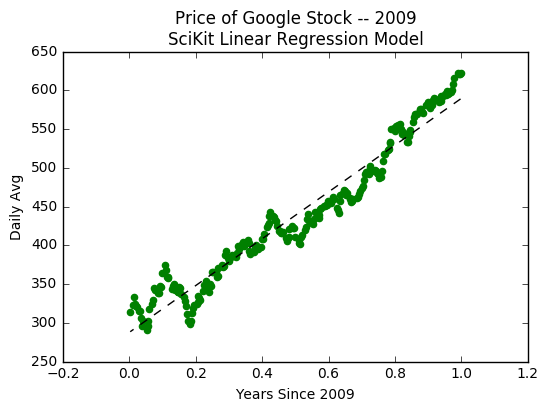

In [22]:
plt.scatter(google[x], google[y], color="green")
plt.plot(google[x], regress.predict(google[x].reshape(-1, 1)), color="black", linestyle="--")
plt.title("Price of Google Stock -- 2009\nSciKit Linear Regression Model")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

## Volume of Shares Bought/Sold Daily and Daily Average

In [23]:
regress2 = LinearRegression()

regress2.fit(google[[x, "Volume"]], google[y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

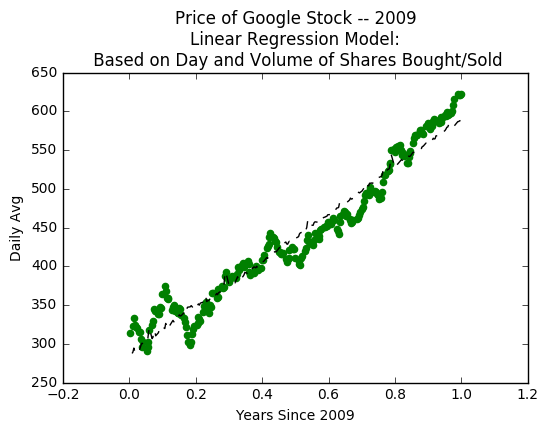

In [24]:
plt.scatter(google[x], google[y], color="green")
plt.plot(google[x], regress2.predict(google[[x, "Volume"]]), color="black", linestyle="--")
plt.title("Price of Google Stock -- 2009\nLinear Regression Model:\n Based on Day and Volume of Shares Bought/Sold")
plt.xlabel(x)
plt.ylabel(y)
plt.show()

## Evaluating the Fit

In [25]:
google[y]

0      622.691063
1      620.371055
2      621.566071
3      622.236085
4      615.896054
5      607.861061
6      600.176039
7      597.756018
8      596.966018
9      595.701008
10     598.506012
11     593.686003
12     594.960999
13     591.241017
14     592.561011
15     586.455989
16     586.331011
17     584.846001
18     587.006017
19     588.226029
20     589.615988
21     587.110993
22     580.391003
23     576.715987
24     584.876020
25     580.415998
26     581.230994
27     570.500996
28     572.000984
29     575.426012
          ...    
222    359.110604
223    357.550607
224    359.000619
225    367.695640
226    374.150633
227    364.625623
228    346.190585
229    346.805584
230    338.415581
231    338.500570
232    342.400593
233    342.580587
234    344.320592
235    329.070565
236    324.280560
237    318.090533
238    302.250533
239    295.925512
240    291.125505
241    301.975519
242    295.185503
243    305.775528
244    315.495542
245    314.590550
246    320

In [28]:
# Daily Range is uncertainty
print(x, y)
chi_sq = sum((google[y] - regress.predict(google[x].reshape(-1, 1)))**2/(google["Daily Range"]**2))

Years Since 2009 Daily Avg
